In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [541]:
#import data
df = pd.read_csv('https://data.cityofnewyork.us/resource/uip8-fykc.csv')

In [542]:
#What the file contains
df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,238552639,2022-01-03T00:00:00.000,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,2022-01-05T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,2022-01-06T00:00:00.000,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,2022-01-08T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,2022-01-12T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)


In [543]:
df.tail()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
995,239678172,2022-01-25T00:00:00.000,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,90,2,25-44,F,BLACK,998002,196692,40.706548,-73.950401,POINT (-73.9504006335643 40.7065483947783)
996,239220231,2022-01-16T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,68,0,45-64,M,WHITE,978700,170198,40.633831,-74.019993,POINT (-74.019993 40.633831)
997,241650053,2022-03-06T00:00:00.000,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1456002,M,K,66,0,25-44,M,WHITE HISPANIC,990817,167525,40.626492,-73.976342,POINT (-73.976342 40.626492)
998,240305373,2022-02-08T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,71,0,25-44,M,WHITE HISPANIC,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
999,239457828,2022-01-19T00:00:00.000,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,M,26,0,18-24,M,WHITE HISPANIC,995265,233097,40.806468,-73.960209,POINT (-73.960209 40.806468)


In [544]:
#The file contains NYC arrest information
#Rows and columns
df.shape

(1000, 19)

In [545]:
#Data type of each column
df.dtypes

arrest_key             int64
arrest_date           object
pd_cd                float64
pd_desc               object
ky_cd                float64
ofns_desc             object
law_code              object
law_cat_cd            object
arrest_boro           object
arrest_precinct        int64
jurisdiction_code      int64
age_group             object
perp_sex              object
perp_race             object
x_coord_cd             int64
y_coord_cd             int64
latitude             float64
longitude            float64
geocoded_column       object
dtype: object

In [546]:
#Type of offenses 
df.groupby(['ofns_desc', 'law_cat_cd'])['arrest_key'].count().sort_values()

ofns_desc                             law_cat_cd
THEFT OF SERVICES                     M               1
OTHER TRAFFIC INFRACTION              I               1
AGRICULTURE & MRKTS LAW-UNCLASSIFIED  M               1
ARSON                                 F               1
DISORDERLY CONDUCT                    V               1
JOSTLING                              M               1
HOMICIDE-NEGLIGENT,UNCLASSIFIE        F               1
NYS LAWS-UNCLASSIFIED FELONY          F               1
(null)                                F               2
ALCOHOLIC BEVERAGE CONTROL LAW        M               2
UNAUTHORIZED USE OF A VEHICLE         M               2
BURGLAR'S TOOLS                       M               2
THEFT-FRAUD                           F               2
SEX CRIMES                            F               2
OFFENSES AGAINST THE PERSON           M               2
FRAUDS                                M               3
OTHER STATE LAWS                      V               3

In [547]:
#Data cleaning
#Change index column to arrest key
#Check if all arrest keys are unqiue
df['arrest_key'].is_unique

True

In [548]:
#Arrest keys are unique
#Set Arrest Key as index column
df = df.set_index('arrest_key')
df.head()

,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
arrest_key,,,,,,,,,,,,,,,,,,
238552639,2022-01-03T00:00:00.000,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
238682242,2022-01-05T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
238723993,2022-01-06T00:00:00.000,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
238821533,2022-01-08T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
239029586,2022-01-12T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)


In [549]:
df.isnull().sum()

arrest_date           0
pd_cd                15
pd_desc               0
ky_cd                21
ofns_desc             0
law_code              0
law_cat_cd           10
arrest_boro           0
arrest_precinct       0
jurisdiction_code     0
age_group             0
perp_sex              0
perp_race             0
x_coord_cd            0
y_coord_cd            0
latitude              0
longitude             0
geocoded_column       0
dtype: int64

In [550]:
#Not recognizing (null) as a missing value
#Set (null) as a missing value
df = df.replace({'(null)': np.nan})

In [551]:
df.isnull().sum()

arrest_date           0
pd_cd                15
pd_desc              21
ky_cd                21
ofns_desc            21
law_code              0
law_cat_cd           10
arrest_boro           0
arrest_precinct       0
jurisdiction_code     0
age_group             0
perp_sex              0
perp_race             0
x_coord_cd            0
y_coord_cd            0
latitude              0
longitude             0
geocoded_column       0
dtype: int64

In [552]:
df[df['ofns_desc'].isnull()]

,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
arrest_key,,,,,,,,,,,,,,,,,,
238821533,2022-01-08T00:00:00.000,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
239029586,2022-01-12T00:00:00.000,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
239406147,2022-01-20T00:00:00.000,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
239828064,2022-01-28T00:00:00.000,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,45-64,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
241020842,2022-02-21T00:00:00.000,NaN,NaN,NaN,NaN,CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
241343600,2022-02-28T00:00:00.000,NaN,NaN,NaN,NaN,CPL5700600,9,Q,102,72,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
242707906,2022-03-27T00:00:00.000,578.0,NaN,NaN,NaN,PL 2223001,M,Q,105,0,25-44,M,BLACK,1057738,204079,40.726529,-73.734865,POINT (-73.7348645378882 40.7265293769835)
243995049,2022-04-21T00:00:00.000,582.0,NaN,NaN,NaN,PL 2225501,F,Q,110,0,25-44,M,WHITE HISPANIC,1020568,209971,40.742925,-73.868935,POINT (-73.868935 40.742925)
244307669,2022-04-27T00:00:00.000,579.0,NaN,NaN,NaN,PL 2224002,F,S,120,0,25-44,M,WHITE,966190,160182,40.606321,-74.065039,POINT (-74.065039 40.606321)


In [553]:
#After researching, there is no information that can be inputted in place of the null values
#Drop null & duplicate values 
df = df.drop_duplicates()
df = df.dropna()
df.isnull().sum()

arrest_date          0
pd_cd                0
pd_desc              0
ky_cd                0
ofns_desc            0
law_code             0
law_cat_cd           0
arrest_boro          0
arrest_precinct      0
jurisdiction_code    0
age_group            0
perp_sex             0
perp_race            0
x_coord_cd           0
y_coord_cd           0
latitude             0
longitude            0
geocoded_column      0
dtype: int64

In [554]:
#Focus on crimes considered as Felonies 
df_felonies = df[df['law_cat_cd'].str.contains('F')]
df_felonies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 238682242 to 239457828
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arrest_date        439 non-null    object 
 1   pd_cd              439 non-null    float64
 2   pd_desc            439 non-null    object 
 3   ky_cd              439 non-null    float64
 4   ofns_desc          439 non-null    object 
 5   law_code           439 non-null    object 
 6   law_cat_cd         439 non-null    object 
 7   arrest_boro        439 non-null    object 
 8   arrest_precinct    439 non-null    int64  
 9   jurisdiction_code  439 non-null    int64  
 10  age_group          439 non-null    object 
 11  perp_sex           439 non-null    object 
 12  perp_race          439 non-null    object 
 13  x_coord_cd         439 non-null    int64  
 14  y_coord_cd         439 non-null    int64  
 15  latitude           439 non-null    float64
 16  longitude   

In [555]:
#Drop unnecessary columns
df_felonies = df_felonies.drop(['arrest_precinct', 'jurisdiction_code', 'pd_desc', 'law_code'], axis = 1)

In [556]:
#Rename columns
df_felonies = df_felonies.rename(columns = {'law_cat_cd':'Level of Offense: Felony', 'arrest_date': 'Date','ofns_desc': 'Offense', 'arrest_boro':'Borough', 'perp_sex':'Sex', 'perp_race': 'Race', 'age_group': 'Age'})
df_felonies.head()

,Date,pd_cd,ky_cd,Offense,Level of Offense: Felony,Borough,Age,Sex,Race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
arrest_key,,,,,,,,,,,,,,
238682242,2022-01-05T00:00:00.000,397.0,105.0,ROBBERY,F,K,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
238723993,2022-01-06T00:00:00.000,153.0,104.0,RAPE,F,K,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
241714804,2022-03-07T00:00:00.000,157.0,104.0,RAPE,F,S,25-44,M,WHITE HISPANIC,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
240199729,2022-02-06T00:00:00.000,792.0,118.0,DANGEROUS WEAPONS,F,K,18-24,M,BLACK,1020226,182992,40.668876,-73.870312,POINT (-73.870312 40.668876)
240402747,2022-02-10T00:00:00.000,153.0,104.0,RAPE,F,K,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)


In [557]:
#Group offenses into boroughs, age group, and sex 
df_felonies.groupby(['Borough', 'Age', 'Sex'])['Offense'].count()

Borough  Age    Sex
B        18-24  F       1
                M      15
         25-44  F       7
                M      38
         45-64  F       4
                M      15
         65+    M       1
         <18    M       3
K        18-24  F       3
                M      23
         25-44  F      11
                M      70
         45-64  M      21
         65+    F       1
                M       2
         <18    F       1
                M       5
M        18-24  F       2
                M      16
         25-44  F       7
                M      34
         45-64  F       4
                M      25
         65+    M       1
         <18    F       1
                M       4
Q        18-24  F       5
                M      19
         25-44  F      12
                M      46
         45-64  F       2
                M      13
         65+    M       2
         <18    M       1
S        18-24  F       1
                M       4
         25-44  F       5
                M 

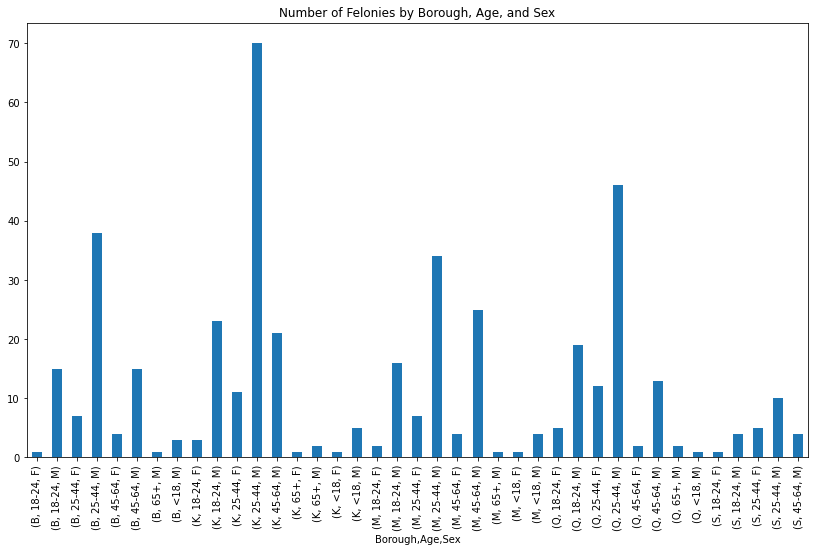

In [558]:
df_felonies.groupby(['Borough', 'Age', 'Sex'])['Offense'].count().plot(kind='bar', figsize=(14,8), title = 'Number of Felonies by Borough, Age, and Sex') 

(0.0, 80.0)

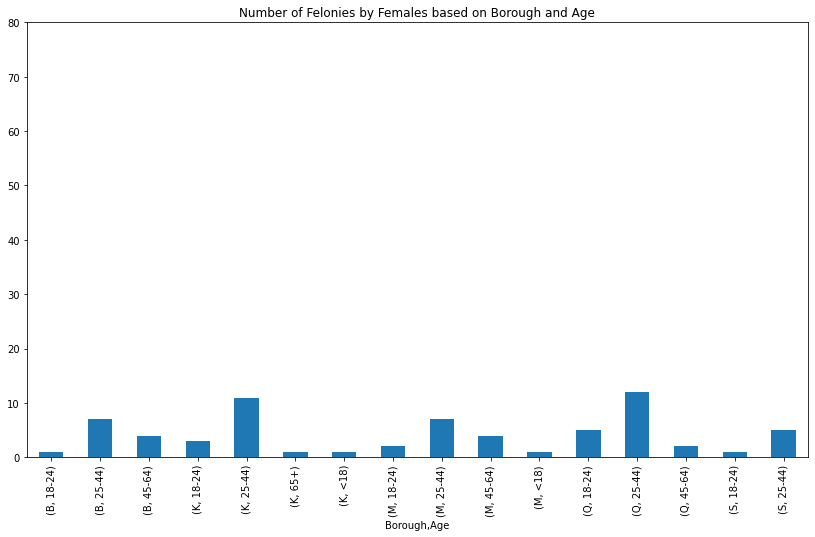

In [559]:
#Data Frame specifying sex to female and male
df_felonies_men = df_felonies[df_felonies['Sex'].str.contains('M')]
df_felonies_female = df_felonies[df_felonies['Sex'].str.contains('F')]
#Graphing number of felonies based on Borough, Age, and specificed sex
df_felonies_female.groupby(['Borough', 'Age'])['Offense'].count().plot(kind ='bar', figsize=(14,8), title = 'Number of Felonies by Females based on Borough and Age').set_ylim([0, 80])

(0.0, 80.0)

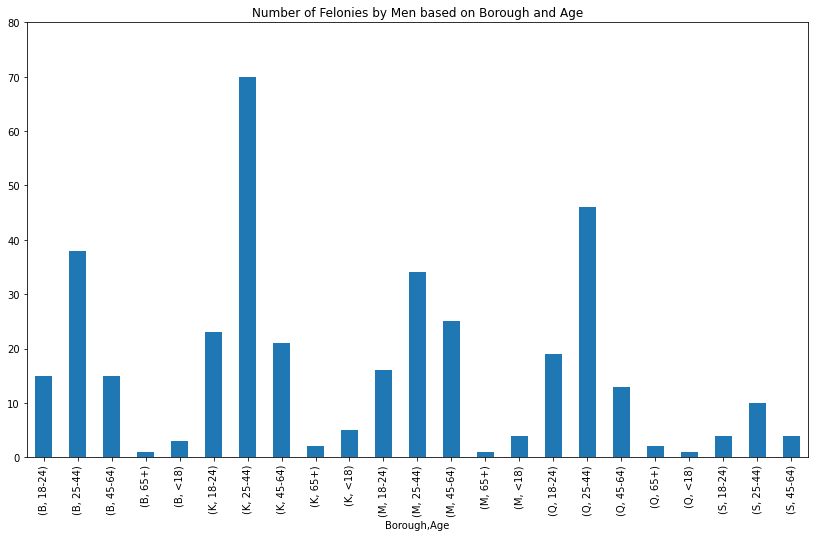

In [560]:
df_felonies_men.groupby(['Borough', 'Age'])['Offense'].count().plot(kind='bar', figsize=(14,8), title = 'Number of Felonies by Men based on Borough and Age').set_ylim([0, 80])

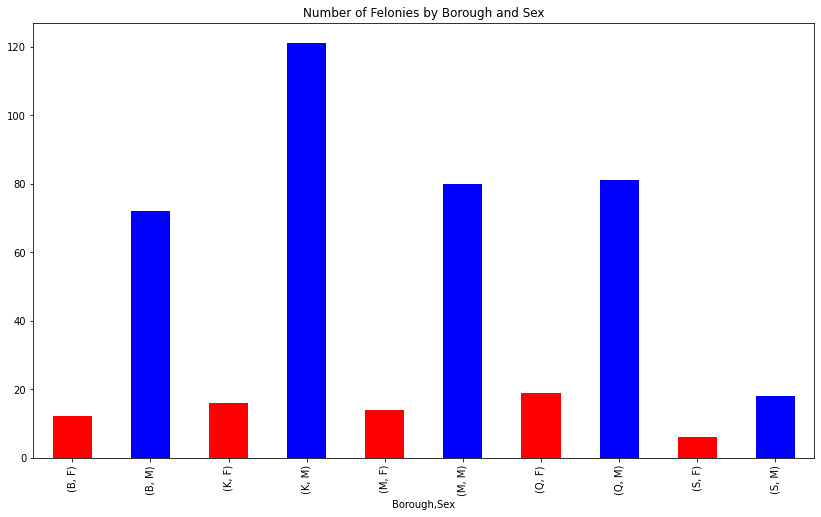

In [561]:
df_felonies.groupby(['Borough', 'Sex'])['Offense'].count().plot(kind='bar', figsize=(14,8), title = 'Number of Felonies by Borough and Sex', color = ['r', 'b']) 

In [562]:
#Number of felonies committed by a female in each borough
df_felonies_female.groupby(['Borough'])['Offense'].count().sort_values()

Borough
S     6
B    12
M    14
K    16
Q    19
Name: Offense, dtype: int64

In [563]:
#Number of felonies committed by a male in each borough
df_felonies_men.groupby(['Borough'])['Offense'].count().sort_values()

Borough
S     18
B     72
M     80
Q     81
K    121
Name: Offense, dtype: int64

  According to this data, the highest number of felonies committed by females were committed in Queens. Whereas the highest number of felonies committed by males were committed in Brooklyn.

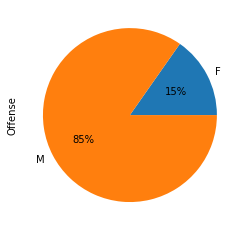

In [564]:
df_felonies.groupby(['Sex'])['Offense'].count().plot(kind='pie', y='Sex', autopct='%1.0f%%')

In [565]:
df_felonies.groupby(['Offense', 'Sex'])['Date'].count()

Offense                         Sex
ARSON                           M       1
BURGLARY                        F       3
                                M      34
CRIMINAL MISCHIEF & RELATED OF  F       4
                                M      25
DANGEROUS DRUGS                 F       3
                                M      30
DANGEROUS WEAPONS               F       5
                                M      24
FELONY ASSAULT                  F      27
                                M      60
FORGERY                         F       2
                                M      15
GRAND LARCENY                   F      10
                                M      32
GRAND LARCENY OF MOTOR VEHICLE  M       6
HOMICIDE-NEGLIGENT,UNCLASSIFIE  M       1
INTOXICATED/IMPAIRED DRIVING    M       4
MISCELLANEOUS PENAL LAW         F       8
                                M      57
MURDER & NON-NEGL. MANSLAUGHTE  M       7
NYS LAWS-UNCLASSIFIED FELONY    M       1
POSSESSION OF STOLEN PROPERTY   F       

Men seem to be committing more felonies than women in all boroughs and all age groups.

The felony with the most perpetrators (for males and females) is felony assault. However, this data suggests that men are almost 3x more likely to commit felony assault than women are (or rather, 3x more likely to be caught committing Felony Assault).  

There are also crimes that males seem to be committing that women are not, or rather, there are crimes that males are more likely to get caught doing than women are (for example: Rape and Sex Crimes). 

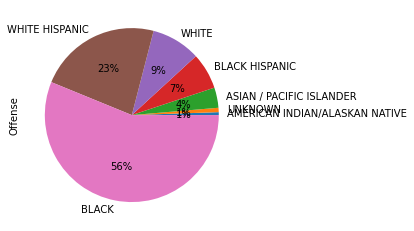

In [566]:
#Focus data towards men, race, and borough
df_felonies_men.groupby(['Race'])['Offense'].count().sort_values().plot(kind='pie', y='Race', autopct='%1.0f%%')

In [567]:
#Creating dataframes based on boroughs
df_felonies_men_Q = df_felonies_men[df_felonies_men['Borough'].str.contains('Q')]
df_felonies_men_B = df_felonies_men[df_felonies_men['Borough'].str.contains('B')]
df_felonies_men_K = df_felonies_men[df_felonies_men['Borough'].str.contains('K')]
df_felonies_men_S = df_felonies_men[df_felonies_men['Borough'].str.contains('S')]
df_felonies_men_M = df_felonies_men[df_felonies_men['Borough'].str.contains('M')]

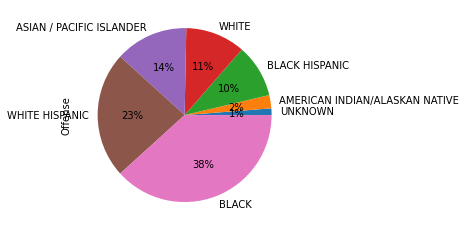

In [568]:
#Felonies committed by males within Queens categorized by race
df_felonies_men_Q.groupby(['Race'])['Offense'].count().sort_values().plot(kind='pie', y='Race', autopct='%1.0f%%')

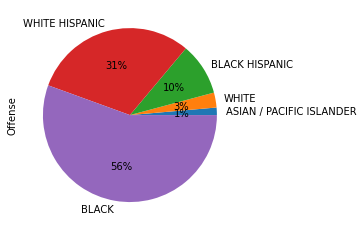

In [569]:
#Felonies committed by males within the Bronx categorized by race
df_felonies_men_B.groupby(['Race'])['Offense'].count().sort_values().plot(kind='pie', y='Race', autopct='%1.0f%%')

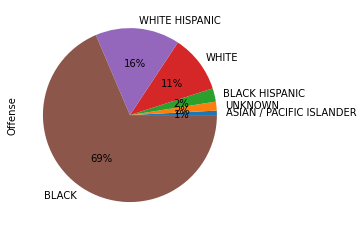

In [570]:
#Felonies committed by males within Brooklyn categorized by race
df_felonies_men_K.groupby(['Race'])['Offense'].count().sort_values().plot(kind='pie', y='Race', autopct='%1.0f%%')

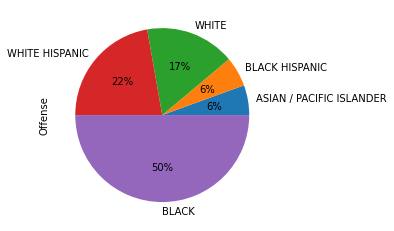

In [571]:
#Felonies committed by males within Staten Island categorized by race
df_felonies_men_S.groupby(['Race'])['Offense'].count().sort_values().plot(kind='pie', y='Race', autopct='%1.0f%%')

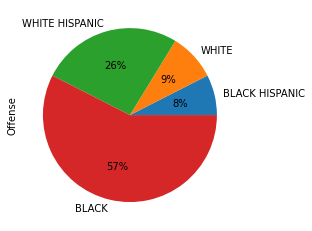

In [572]:
#Felonies committed by males within Manhattan categorized by race
df_felonies_men_M.groupby(['Race'])['Offense'].count().sort_values().plot(kind='pie', y='Race', autopct='%1.0f%%')

This data suggests that crimes committed in each Borough, are primarly Black males. However, it is important to note that this data does not incorporate any prejudices, discrimination, and police brutality faced by the Black community (which leads to higher rates of arrest in each borough). 